<a href="https://colab.research.google.com/github/leksangpelkey/project2/blob/main/project2Diabetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt

In [4]:
%matplotlib inline

In [5]:
import seaborn as sns

Assingning the missing value

In [6]:
missing_values = ["?","na","--"]

Loading the dataframe from github

In [7]:
df = pd.read_csv("https://raw.githubusercontent.com/niteen11/DataAnalyticsAcademy/master/Python/dataset_diabetes/diabetic_data.csv",na_values = missing_values)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
df.info

<bound method DataFrame.info of         encounter_id  patient_nbr  ... diabetesMed readmitted
0            2278392      8222157  ...          No         NO
1             149190     55629189  ...         Yes        >30
2              64410     86047875  ...         Yes         NO
3             500364     82442376  ...         Yes         NO
4              16680     42519267  ...         Yes         NO
...              ...          ...  ...         ...        ...
101761     443847548    100162476  ...         Yes        >30
101762     443847782     74694222  ...         Yes         NO
101763     443854148     41088789  ...         Yes         NO
101764     443857166     31693671  ...         Yes         NO
101765     443867222    175429310  ...          No         NO

[101766 rows x 50 columns]>

In [9]:
df.head(5)

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [10]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

Checking if encounter id is unique

In [11]:
df['encounter_id'].is_unique

True

setting encounter_id as index value

In [12]:
df= df.set_index('encounter_id')

In [13]:
df.head(5)

,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
encounter_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [14]:
df.dtypes

patient_nbr                  int64
race                        object
gender                      object
age                         object
weight                      object
admission_type_id            int64
discharge_disposition_id     int64
admission_source_id          int64
time_in_hospital             int64
payer_code                  object
medical_specialty           object
num_lab_procedures           int64
num_procedures               int64
num_medications              int64
number_outpatient            int64
number_emergency             int64
number_inpatient             int64
diag_1                      object
diag_2                      object
diag_3                      object
number_diagnoses             int64
max_glu_serum               object
A1Cresult                   object
metformin                   object
repaglinide                 object
nateglinide                 object
chlorpropamide              object
glimepiride                 object
acetohexamide       

creating new dataframe with required columns

In [15]:
new_df = df[['patient_nbr','race','gender','age','weight','time_in_hospital','medical_specialty','number_diagnoses', 'num_lab_procedures','num_procedures','change','diabetesMed','insulin']]

In [16]:
new_df.head(5)

,patient_nbr,race,gender,age,weight,time_in_hospital,medical_specialty,number_diagnoses,num_lab_procedures,num_procedures,change,diabetesMed,insulin
encounter_id,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,1,Pediatrics-Endocrinology,1,41,0,No,No,No
149190,55629189,Caucasian,Female,[10-20),NaN,3,NaN,9,59,0,Ch,Yes,Up
64410,86047875,AfricanAmerican,Female,[20-30),NaN,2,NaN,6,11,5,No,Yes,No
500364,82442376,Caucasian,Male,[30-40),NaN,2,NaN,7,44,1,Ch,Yes,Up
16680,42519267,Caucasian,Male,[40-50),NaN,1,NaN,5,51,0,Ch,Yes,Steady


In [17]:
new_df.shape

(101766, 13)

Renaming the columns

In [18]:
new_df = new_df.rename(columns={'num_lab_procedures':'lab_test','num_procedures':'other_tests','change': 'change_medication','diabetesMed':'medication_prescribed' })

In [19]:
new_df.head(5)

,patient_nbr,race,gender,age,weight,time_in_hospital,medical_specialty,number_diagnoses,lab_test,other_tests,change_medication,medication_prescribed,insulin
encounter_id,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),NaN,1,Pediatrics-Endocrinology,1,41,0,No,No,No
149190,55629189,Caucasian,Female,[10-20),NaN,3,NaN,9,59,0,Ch,Yes,Up
64410,86047875,AfricanAmerican,Female,[20-30),NaN,2,NaN,6,11,5,No,Yes,No
500364,82442376,Caucasian,Male,[30-40),NaN,2,NaN,7,44,1,Ch,Yes,Up
16680,42519267,Caucasian,Male,[40-50),NaN,1,NaN,5,51,0,Ch,Yes,Steady


In [20]:
new_df.isnull()

,patient_nbr,race,gender,age,weight,time_in_hospital,medical_specialty,number_diagnoses,lab_test,other_tests,change_medication,medication_prescribed,insulin
encounter_id,,,,,,,,,,,,,
2278392,False,False,False,False,True,False,False,False,False,False,False,False,False
149190,False,False,False,False,True,False,True,False,False,False,False,False,False
64410,False,False,False,False,True,False,True,False,False,False,False,False,False
500364,False,False,False,False,True,False,True,False,False,False,False,False,False
16680,False,False,False,False,True,False,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
443847548,False,False,False,False,True,False,True,False,False,False,False,False,False
443847782,False,False,False,False,True,False,True,False,False,False,False,False,False
443854148,False,False,False,False,True,False,True,False,False,False,False,False,False


In [21]:
new_df.isnull().sum()

patient_nbr                  0
race                      2273
gender                       0
age                          0
weight                   98569
time_in_hospital             0
medical_specialty        49949
number_diagnoses             0
lab_test                     0
other_tests                  0
change_medication            0
medication_prescribed        0
insulin                      0
dtype: int64

In [22]:
new_df['weight'].describe()

count         3197
unique           9
top       [75-100)
freq          1336
Name: weight, dtype: object

In [23]:
new_df['weight'].value_counts().head(10)

[75-100)     1336
[50-75)       897
[100-125)     625
[125-150)     145
[25-50)        97
[0-25)         48
[150-175)      35
[175-200)      11
>200            3
Name: weight, dtype: int64

Imputation: replacing '?' with 0 in weight column to retain the data

In [24]:
new_df['weight'].fillna(0, inplace =True)

checking if the imputation has taken place

In [25]:
new_df['weight'].describe()

count     101766
unique        10
top            0
freq       98569
Name: weight, dtype: int64

In [26]:
new_df.head(15)

,patient_nbr,race,gender,age,weight,time_in_hospital,medical_specialty,number_diagnoses,lab_test,other_tests,change_medication,medication_prescribed,insulin
encounter_id,,,,,,,,,,,,,
2278392,8222157,Caucasian,Female,[0-10),0,1,Pediatrics-Endocrinology,1,41,0,No,No,No
149190,55629189,Caucasian,Female,[10-20),0,3,NaN,9,59,0,Ch,Yes,Up
64410,86047875,AfricanAmerican,Female,[20-30),0,2,NaN,6,11,5,No,Yes,No
500364,82442376,Caucasian,Male,[30-40),0,2,NaN,7,44,1,Ch,Yes,Up
16680,42519267,Caucasian,Male,[40-50),0,1,NaN,5,51,0,Ch,Yes,Steady
35754,82637451,Caucasian,Male,[50-60),0,3,NaN,9,31,6,No,Yes,Steady
55842,84259809,Caucasian,Male,[60-70),0,4,NaN,7,70,1,Ch,Yes,Steady
63768,114882984,Caucasian,Male,[70-80),0,5,NaN,8,73,0,No,Yes,No
12522,48330783,Caucasian,Female,[80-90),0,13,NaN,8,68,2,Ch,Yes,Steady


In [27]:
new_df['race'].unique()

array(['Caucasian', 'AfricanAmerican', nan, 'Other', 'Asian', 'Hispanic'],
      dtype=object)

In [28]:
new_df['weight'].unique()

array([0, '[75-100)', '[50-75)', '[0-25)', '[100-125)', '[25-50)',
       '[125-150)', '[175-200)', '[150-175)', '>200'], dtype=object)

In [29]:
new_df['age'].unique()

array(['[0-10)', '[10-20)', '[20-30)', '[30-40)', '[40-50)', '[50-60)',
       '[60-70)', '[70-80)', '[80-90)', '[90-100)'], dtype=object)

plotting in pie chart in gender bases patient


In [30]:
female_patient= new_df.loc[new_df['gender']=='Female'].count()[0]

male_patient= new_df.loc[new_df['gender']=='Male'].count()[0]

labels = ['female_patient','male_patient']
colors = ['#abcdef', '#aabbcc']


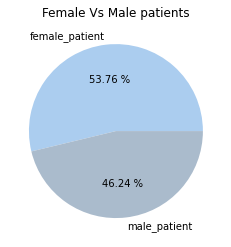

In [31]:
plt.pie([female_patient, male_patient], labels = labels, colors = colors, autopct ='%.2f %%')
plt.title('Female Vs Male patients')
plt.show()

In [32]:
new_df['lab_test'].min()

1

In [33]:
new_df['lab_test'].max()

132

Percentage of patient in age group

In [34]:
plt.style.use('ggplot')

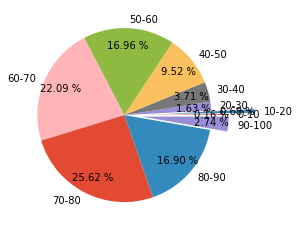

In [35]:
agegroup1 =  new_df.loc[ new_df.age=='[0-10)'].count()[0]
agegroup2 =  new_df.loc[ new_df.age=='[10-20)'].count()[0]
agegroup3 =  new_df.loc[ new_df.age=='[20-30)'].count()[0]
agegroup4 =  new_df.loc[ new_df.age=='[30-40)'].count()[0]
agegroup5 =  new_df.loc[ new_df.age=='[40-50)'].count()[0]
agegroup6 =  new_df.loc[ new_df.age=='[50-60)'].count()[0]
agegroup7 =  new_df.loc[ new_df.age=='[60-70)'].count()[0]
agegroup8 =  new_df.loc[ new_df.age=='[70-80)'].count()[0]
agegroup9 =  new_df.loc[ new_df.age=='[80-90)'].count()[0]
agegroup10 =  new_df.loc[ new_df.age=='[90-100)'].count()[0]

ages = [agegroup1, agegroup2, agegroup3, agegroup4, agegroup5, agegroup6,
        agegroup7, agegroup8, agegroup9, agegroup10]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100']    
explode=(.2,.5,0,0,0,0,0,0,0,.2)
plt.pie(ages, labels=labels, autopct= '%.2f %%', pctdistance=0.8,explode= explode)

plt.show()      



/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


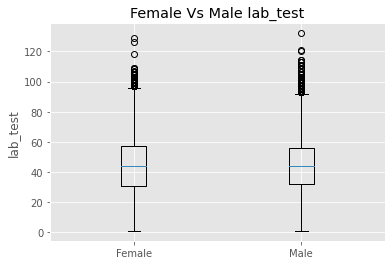

In [36]:
female_patient1= new_df.loc[new_df['gender']=='Female']['lab_test']

male_patient1= new_df.loc[new_df['gender']=='Male']['lab_test']

labels = ['Female','Male']

plt.boxplot([female_patient1,male_patient1], labels =labels)

plt.title('Female Vs Male lab_test')
plt.ylabel('lab_test')

plt.show()

[Text(0.5, 1.0, 'Lab test by Race')]

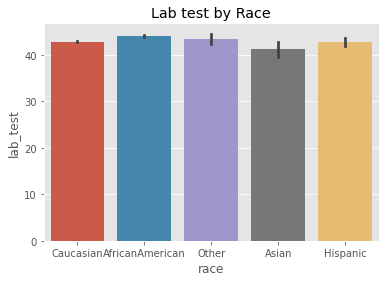

In [37]:
sns.barplot(x='race', y ='lab_test', data =new_df).set(title="Lab test by Race")




In [38]:
maxpatientgroup = new_df[new_df['age'].isin(['[60-70)','[70-80)'])]

[Text(0.5, 1.0, 'number of diagones by Race')]

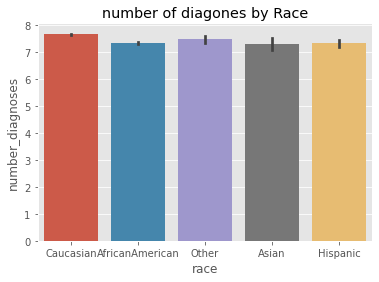

In [39]:
sns.barplot(x='race', y ='number_diagnoses', data =maxpatientgroup).set(title="number of diagones by Race")

In [40]:
maxpatientgroup.groupby(['medical_specialty']).count()

,patient_nbr,race,gender,age,weight,time_in_hospital,number_diagnoses,lab_test,other_tests,change_medication,medication_prescribed,insulin
medical_specialty,,,,,,,,,,,,
AllergyandImmunology,5,5,5,5,5,5,5,5,5,5,5,5
Anesthesiology,2,2,2,2,2,2,2,2,2,2,2,2
Cardiology,2980,2924,2980,2980,2980,2980,2980,2980,2980,2980,2980,2980
DCPTEAM,2,2,2,2,2,2,2,2,2,2,2,2
Dentistry,1,1,1,1,1,1,1,1,1,1,1,1
Emergency/Trauma,3194,3183,3194,3194,3194,3194,3194,3194,3194,3194,3194,3194
Endocrinology,40,40,40,40,40,40,40,40,40,40,40,40
Endocrinology-Metabolism,1,1,1,1,1,1,1,1,1,1,1,1
Family/GeneralPractice,3330,3259,3330,3330,3330,3330,3330,3330,3330,3330,3330,3330


max patient group medical specialty (mpgms) Checking the medical specialty (cardiology,InternalMedicine, Surgery-General) in max age group of patient i.e. (between 60 - 80)

In [41]:
mpgms= maxpatientgroup.loc[(maxpatientgroup['medical_specialty']=='Cardiology')|(maxpatientgroup['medical_specialty']=='Surgery-General')|(maxpatientgroup['medical_specialty']=='InternalMedicine')].head()

In [42]:
mpgms.groupby(['medical_specialty']).count()

,patient_nbr,race,gender,age,weight,time_in_hospital,number_diagnoses,lab_test,other_tests,change_medication,medication_prescribed,insulin
medical_specialty,,,,,,,,,,,,
Cardiology,3,3,3,3,3,3,3,3,3,3,3,3
InternalMedicine,1,1,1,1,1,1,1,1,1,1,1,1
Surgery-General,1,1,1,1,1,1,1,1,1,1,1,1


Plotting number of days in hospital by top 3 medical specialty group

[Text(0.5, 1.0, 'Time in hospital by medical specialty')]

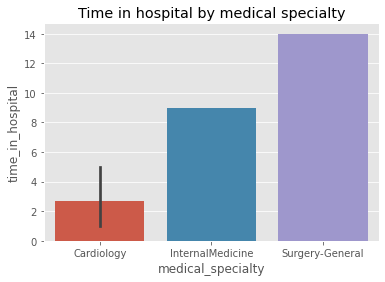

In [43]:
sns.barplot(x='medical_specialty', y ='time_in_hospital', data =mpgms).set(title="Time in hospital by medical specialty")

Plotting number of diagones by medical specialty

[Text(0.5, 1.0, ' Number of diagones by medical specialty')]

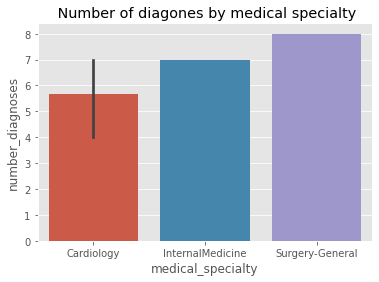

In [44]:
sns.barplot(x='medical_specialty', y ='number_diagnoses', data =mpgms).set(title=" Number of diagones by medical specialty")